# Análise PISA e modelo de clusterização

**Pacotes python**

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import  KMeans
import folium
from folium.plugins import HeatMap


**Dataset**

In [93]:
FILE = 'Indice educacao.xlsx'
df = pd.read_excel(FILE)

**Explorando os dados**

In [94]:
display(df.head(10))
display(df.columns)
display(df.info())
display(df.isnull().sum)

,Posição,País / Economia,Pontuação PISA (2022),IDH (últimos dados),PIB (em bilhões de USD),Continente
0,1,Singapura,575,0.939,547.39,Ásia
1,2,Macau (China),552,0.914,25.40,Ásia
2,3,Taiwan,547,N/A*,759.00,Ásia
3,4,Hong Kong (China),540,0.952,407.11,Ásia
4,5,Japão,536,0.925,4026.21,Ásia
5,6,Coreia do Sul,527,0.925,1712.79,Ásia
6,7,Estônia,510,0.892,42.91,Europa
7,8,Suíça,508,0.97,936.56,Europa
8,9,Canadá,497,0.929,2241.25,América do Norte
9,10,Países Baixos,493,0.944,1088.27,Europa


Index(['Posição', 'País / Economia', 'Pontuação PISA (2022)',
       'IDH (últimos dados)', 'PIB (em bilhões de USD)', 'Continente'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posição                  20 non-null     int64  
 1   País / Economia          20 non-null     object 
 2   Pontuação PISA (2022)    20 non-null     int64  
 3   IDH (últimos dados)      20 non-null     object 
 4   PIB (em bilhões de USD)  20 non-null     float64
 5   Continente               20 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


None

<bound method DataFrame.sum of     Posição  País / Economia  Pontuação PISA (2022)  IDH (últimos dados)  \
0     False            False                  False                False   
1     False            False                  False                False   
2     False            False                  False                False   
3     False            False                  False                False   
4     False            False                  False                False   
5     False            False                  False                False   
6     False            False                  False                False   
7     False            False                  False                False   
8     False            False                  False                False   
9     False            False                  False                False   
10    False            False                  False                False   
11    False            False                  False                False   
12    False            False                  False                False   
13    False            False                  False                False   
14    False            False                  False                False   
15    False            False                  False                False   
16    False            False                  False                False   
17    False            False                  False                False   
18    False            False                  False                False   
19    False            False                  False                False   

    PIB (em bilhões de USD)  Continente  
0                     False       False  
1                     False       False  
2                     False       False  
3                     False       False  
4                     False       False  
5                     False       False  
6                     False       False  
7                     False       False  
8                     False       False  
9                     False       False  
10                    False       False  
11                    False       False  
12                    False       False  
13                    False       False  
14                    False       False  
15                    False       False  
16                    False       False  
17                    False       False  
18                    False       False  
19                    False       False  >

**Tratamento**

In [95]:
df['IDH (últimos dados)'] = pd.to_numeric(df['IDH (últimos dados)'], errors='coerce')

In [96]:
df['IDH (últimos dados)'].fillna(df['IDH (últimos dados)'].median(), inplace=True)

/tmp/ipython-input-3693468995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IDH (últimos dados)'].fillna(df['IDH (últimos dados)'].median(), inplace=True)


In [97]:
df = df.drop('Posição', axis=1)

In [98]:
df.columns = ['pais','pisa','idh','pib','continente']

**Pré-processamento**

- Selecionando as colunas

In [99]:
col_num = ['pib','idh','pisa']
col_str = ['pais','continente']

- Criando o pre-processamento

In [100]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), col_str),
        ('num', StandardScaler(), col_num)
    ]
)

data = ct.fit_transform(df[col_str + col_num])

##Aplicando o metodo do cotovelo**

- Numero de clusters

In [101]:
K = range(1, 10)
wcss = []

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=50, n_init=10)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)


**Visualizando os clusters**

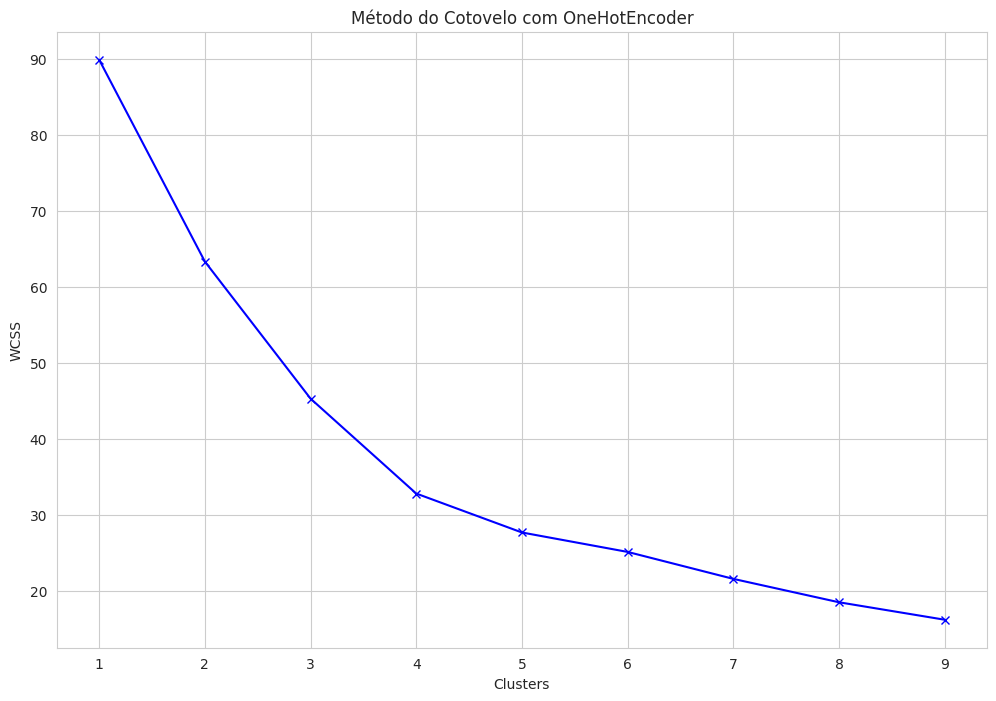

In [102]:
plt.figure(figsize=(12,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo com OneHotEncoder')
plt.show();



# 📊 Conclusão do Agrupamento
> O número de clusters ideal para o modelo K-Means está entre 3 a 4.

**Modelo final com 4 clusters**

In [103]:
model = KMeans(n_clusters=4, random_state=50, n_init=10)
df['cluster'] = model.fit_predict(data) + 1



##Cluster para cada continente**

In [76]:
continent_cluster = df.groupby(['continente'])['cluster'].value_counts()
display(continent_cluster)

continente        cluster
América do Norte  4          1
Europa            3          6
                  1          5
                  4          1
Oceania           3          1
Ásia              2          5
                  4          1
Name: count, dtype: int64

  > Grupo 2 (Exclusivamente Ásia): Este grupo de países asiáticos se destaca por ter um perfil único. Eles não se assemelham a nenhum outro grupo e formam sua própria categoria, indicando um modelo de sucesso em que a alta pontuação no PISA está alinhada a outros fatores de desenvolvimento, diferenciando-os do restante do mundo.



  > Grupos 3 e 4 (Mistos): Esses grupos mostram que a performance de países da Europa, Ásia, América do Norte e Oceania se misturam. Isso sugere que o nível de desenvolvimento educacional e social transcende as fronteiras continentais, formando um "clube" de nações de alto desempenho, independentemente de onde estejam localizadas.



**Média do PISA para cada cluster**

In [77]:
mean_cluster = df.groupby('cluster')['pisa'].mean().sort_values(ascending=False)
display(mean_cluster )

,pisa
cluster,
2,548.200000
4,507.333333
1,491.800000
3,491.571429


# 💡 Conclusão do Agrupamento
>Grupo 2 (Principalmente Asiático): Este cluster se destaca com a maior média de Pontuação PISA. Esse resultado mostra que a maioria dos países asiáticos neste grupo apresenta um desempenho educacional superior, o que os diferencia do restante.
>Grupos 1, 3 e 4 (Principalmente Ocidentais): Juntos, esses grupos são formados majoritariamente por países ocidentais da Europa, Oceania e América do Norte. Suas médias de Pontuação PISA são inferiores à do Grupo 2, indicando que, embora tenham bom desempenho, eles não atingem o mesmo nível de excelência educacional.




**IDH e PIB dos clusters**

In [78]:
cluster_idh = df.groupby('cluster')['idh'].mean().sort_values(ascending=False)
cluster_pib = df.groupby('cluster')['pib'].mean().sort_values(ascending=False)

In [79]:
display(cluster_idh)
display(cluster_pib)

,idh
cluster,
3,0.942429
2,0.931400
4,0.928667
1,0.870200


,pib
cluster,
4,3303.763333
3,767.518571
2,690.338000
1,438.924000


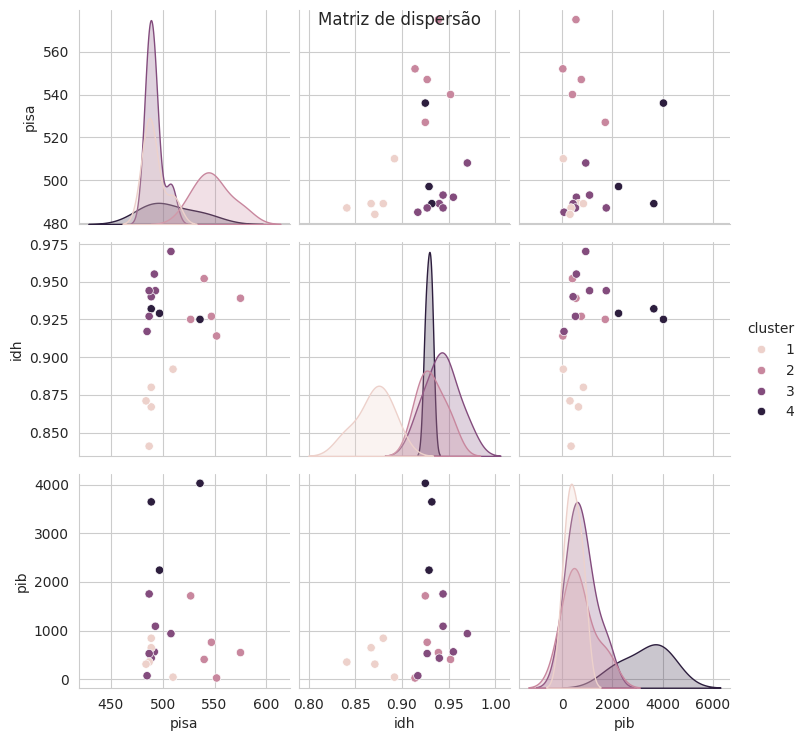

In [80]:
sns.set_style('whitegrid')
fig = sns.pairplot(data=df, hue='cluster')
fig.fig.suptitle('Matriz de dispersão')
plt.show()

⭐ O Cluster 2, formado principalmente por países asiáticos, apresenta um desempenho equilibrado em IDH e PIB, destacando-se por ser o primeiro em Pontuação PISA. Em contraste, os Clusters 1, 3 e 4, compostos por países ocidentais da Europa, América do Norte e Oceania, têm um desempenho inferior no PISA, mas se sobressaem com resultados superiores em IDH e PIB.

In [115]:
df['pais'].values

array(['Singapura', 'Macau (China)', 'Taiwan', 'Hong Kong (China)',
       'Japão', 'Coreia do Sul', 'Estônia', 'Suíça', 'Canadá',
       'Países Baixos', 'Irlanda', 'Bélgica', 'Dinamarca', 'Reino Unido',
       'Polônia', 'Austrália', 'Áustria', 'República Tcheca', 'Eslovênia',
       'Finlândia'], dtype=object)

**Adicionando cordenadas**

In [116]:
lat = {
    "Singapura": 1.3521,
    "Macau (China)": 22.1987,
    "Taiwan": 23.6978,
    "Hong Kong (China)": 22.3193,
    "Japão": 36.2048,
    "Coreia do Sul": 35.9078,
    "Estônia": 58.5953,
    "Suíça": 46.8182,
    "Canadá": 56.1304,
    "Países Baixos": 52.1326,
    "Irlanda": 53.3331,
    "Bélgica": 50.8503,
    "Dinamarca": 56.2639,
    "Reino Unido": 55.3781,
    "Polônia": 51.9194,
    "Austrália": -25.2744,
    "Áustria": 47.5162,
    "República Tcheca": 49.8175,
    "Eslovênia": 46.1512,
    "Finlândia": 61.9241
}

lng = {
    "Singapura": 103.8198,
    "Macau (China)": 113.5439,
    "Taiwan": 120.9605,
    "Hong Kong (China)": 114.1694,
    "Japão": 138.2529,
    "Coreia do Sul": 127.7669,
    "Estônia": 25.0136,
    "Suíça": 8.2275,
    "Canadá": -106.3468,
    "Países Baixos": 5.2913,
    "Irlanda": -6.2489,
    "Bélgica": 4.3517,
    "Dinamarca": 9.5018,
    "Reino Unido": -3.4360,
    "Polônia": 19.1451,
    "Austrália": 133.7751,
    "Áustria": 14.5501,
    "República Tcheca": 15.4730,
    "Eslovênia": 14.9955,
    "Finlândia": 25.7482
}

df['lat'] = df['pais'].map(lat)
df['lng'] = df['pais'].map(lng)

In [122]:
df.to_csv('global_pisa.csv', index=False)

for column in df

##Mapa dos clusters**

In [120]:

cluster_colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple'
}

center_lat = df['lat'].mean()
center_lng = df['lng'].mean()

m = folium.Map(location=[center_lat, center_lng], zoom_start=2)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=12,
        color=cluster_colors.get(row['cluster']),
        fill=True,
        fill_color=cluster_colors.get(row['cluster']),
        fill_opacity=0.7,
        tooltip=f"<b>Country:</b> {row['pais']}<br>"
                f"<b>Continent:</b> {row['continente']}<br>"
                f"<b>Cluster:</b> {row['cluster']}"
    ).add_to(m)

m

# Mapa de calor

In [119]:


center_lat = df['lat'].mean()
center_lng = df['lng'].mean()

m = folium.Map(location=[center_lat, center_lng], zoom_start=2)

for column in ['idh', 'pib', 'pisa']:
    layer = folium.FeatureGroup(name=f"HeatMap - {column.upper()}")

    heat_data = [
        [row['lat'], row['lng'], row[column]]
        for _, row in df.iterrows()
        if not pd.isnull(row[column])
    ]

    HeatMap(heat_data, radius=25, blur=15, max_zoom=6).add_to(layer)

    for _, row in df.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"{row['pais']}<br>{column.upper()}: {row[column]}",
            tooltip=row['pais'],
            icon=folium.Icon(color='green')
        ).add_to(layer)

    layer.add_to(m)

folium.LayerControl().add_to(m)

m